In [129]:
# Analysis on Covid-vaccine uptake/ Vaccine hesitancy
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [158]:
data = pd.read_csv("vaccine_cleaned")


In [235]:
# # drop 0/ didn't take vaccine from the vaccine column
# data_yes = data[data['VaccineStatus'] != 0]

data_yes = data.loc[data['VaccineStatus'] == 1]
data_yes.to_csv('data_yes',encoding='utf-8', index=False)


In [234]:
# remove vaccine status column
# data_yes = data_yes.drop(columns=['VaccineStatus'])
data_no = data.loc[data['VaccineStatus'] == 0]
data_no.to_csv('data_no',encoding='utf-8', index=False)

In [105]:
# data_yes = data_yes.drop('VaccineStatus', axis=1)
# data_yes.isnull().sum()

In [166]:
# set features to encode, by removing age and vaccine status columns
data_4_edit = data.drop(['age', 'studysite'], axis=1)

# features to encode
data_4_features = data_4_edit

# outcome
data_4_outcome = data[['age','studysite']]

In [167]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data_sparse = encoder.fit_transform(data_4_features)

# Convert sparse matrix to a dense array
encoded_data = encoded_data_sparse.toarray()

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(data_4_features.columns))

In [187]:
data_5 = pd.concat([encoded_df,data_4_outcome.reset_index(drop=True)], axis=1)

In [188]:
data_5.head(5)

,gender_Female,gender_Male,marital_status_Married,marital_status_Others,marital_status_Single,education_Diploma,education_Postgraduate,education_School Education,education_Undergraduate,employed_Employed / Self Employed,...,pharmaceutical_Checked,pharmaceutical_Unchecked,scientific articles_Checked,scientific articles_Unchecked,don't_trust_Checked,don't_trust_Unchecked,VaccineStatus_0,VaccineStatus_1,age,studysite
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,27.0,private
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,27.0,private
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,32.0,private
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,29.0,private
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,29.0,private


In [218]:
# group hospital names/ study site
study_site = {
    'private':1, 
    'faith':2,
    'public':3
}
data_5['studysite'] = data_5['studysite'].replace(study_site)
data_5['studysite'] = data_5['studysite'].astype('category')

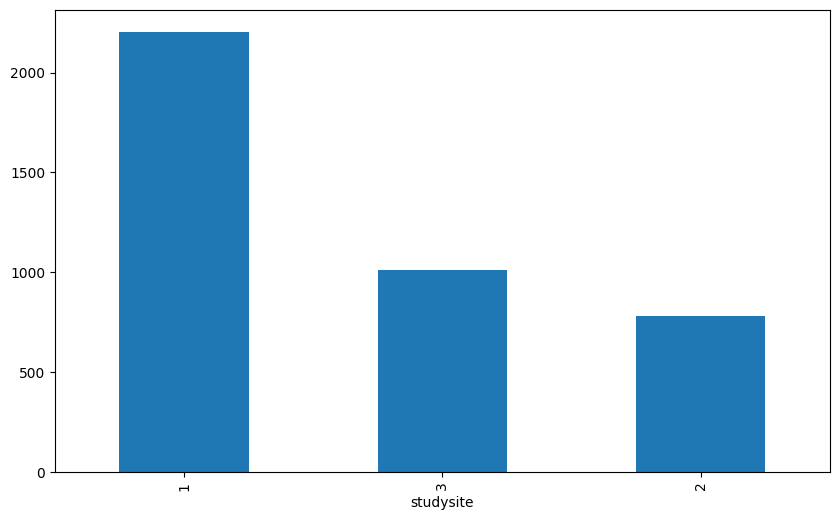

In [219]:
value_counts = data_5['studysite'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.show()

In [220]:
# Correlation between variables 
correlation = data_5.corr()

corr = abs(correlation['studysite'])

# Select highest correlating values
co_Features = corr[corr>0.1]
co_Features.drop(labels=['studysite'], inplace=True)
co_Features.sort_values(ascending=False, inplace=True)
co_Features.head(20)

free_citizens_Strongly Agree               0.357000
protect_against_covid_Strongly Agree       0.325266
education_School Education                 0.322624
protect_people_Strongly Agree              0.297015
recommend_family_Strongly Agree            0.296778
VaccineStatus_0                            0.286744
VaccineStatus_1                            0.286744
hcp_Checked                                0.283697
hcp_Unchecked                              0.283697
free_citizens_Agree                        0.270350
employed_Unemployed                        0.234111
recommend_family_Disagree                  0.230711
exposed_covid_No                           0.228153
exposed_covid_Yes                          0.228153
hesitant_side_effects_Strongly Disagree    0.227962
employed_Employed / Self Employed          0.219308
faulty_fake_Strongly Disagree              0.211770
europe_america_Neutral                     0.210772
job_worries_Checked                        0.210642
job_worries_

In [221]:
# Prepare input/target variables
input = data_5.drop(['studysite'], axis=1)
target = data_5['studysite'].values

from sklearn.model_selection import train_test_split
X = input
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [222]:
# SVM classifier
from sklearn import svm
clf = svm.SVC()
clf = clf.fit(X_train, y_train)

In [223]:
predictions = clf.predict(X_test)

In [224]:
# Performance metrics
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6672226855713094

In [225]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [226]:
model.score(X_test, y_test)

0.7981651376146789

In [217]:
n_runs = 20
accuracies = []  # to store accuracy for each run

for run in range(n_runs):
    # Split the data into training and testing sets for each run
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Initialize the Random Forest model
    model = RandomForestClassifier(n_estimators=300, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Optionally, print the accuracy for each run
    print(f"Run {run+1}: Accuracy = {accuracy:.2f}")


Run 1: Accuracy = 0.81
Run 2: Accuracy = 0.78
Run 3: Accuracy = 0.78
Run 4: Accuracy = 0.79
Run 5: Accuracy = 0.79
Run 6: Accuracy = 0.82
Run 7: Accuracy = 0.81
Run 8: Accuracy = 0.77
Run 9: Accuracy = 0.81
Run 10: Accuracy = 0.79
Run 11: Accuracy = 0.78
Run 12: Accuracy = 0.79
Run 13: Accuracy = 0.82
Run 14: Accuracy = 0.80
Run 15: Accuracy = 0.80
Run 16: Accuracy = 0.79
Run 17: Accuracy = 0.83
Run 18: Accuracy = 0.80
Run 19: Accuracy = 0.78
Run 20: Accuracy = 0.81
